In [102]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [103]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\alice\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.14.1)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [104]:
import pandas as pd

file_path = './csv_recebidos/Distâncias_aeroportos.csv' #Caminho para o arquivo com as distâncias 
file_path1 = './csv_recebidos/Nome_Aeroporto.csv'  #Caminho para o arquivo com os nomes dos aeroportos

#Recebe o conteúdo do .csv e converte em um dataframe
df = pd.read_csv(file_path) 
df_nome = pd.read_csv(file_path1)
df = df.drop('Distance m', axis=1)

In [105]:
df.columns = ['InputID', 'TargetID', 'Distância km']
df

,InputID,TargetID,Distância km
0,1,2,2095
1,1,3,1448
2,1,4,2294
3,1,5,2318
4,1,6,2337
...,...,...,...
7305,86,81,919
7306,86,82,822
7307,86,83,561
7308,86,84,363


In [106]:
mapa_ids = {i+1: nome for i, nome in enumerate(df_nome['Aeroporto'])}  #Associa o nome de cada aeroporto ao df dele

#Substitui o id das colunas InputID e TargetID pelo nome do aeroporto
df['InputID'] = df['InputID'].replace(mapa_ids)
df['TargetID'] = df['TargetID'].replace(mapa_ids)
#Incluir equação de cálculo de CO2 futuramente
df['Emissão de CO2'] = df['Distância km'] * 0.123   #Cria a coluna Emissão de CO2
df

,InputID,TargetID,Distância km,Emissão de CO2
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional do Recife,2095,257.685
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Salvador,1448,178.104
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Natal,2294,282.162
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de São Luís,2318,285.114
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Fortaleza,2337,287.451
...,...,...,...,...
7305,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de São José dos Campos,919,113.037
7306,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Viracopos,822,101.106
7307,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Curitiba,561,69.003
7308,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Florianópolis,363,44.649


In [107]:
#Formata as horas para esta no formato Horas:Minutos
def format_time(hours):
    h = int(hours)
    m = int((hours - h) * 60)
    return f"{h:02}:{m:02}"

# Cálculo do tempo médio para Comercial
df['Tempo Médio Horas - Comercial'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 900)} ~ {format_time(d / 850)}"
)

# Cálculo do tempo médio para Cargueiro
df['Tempo Médio Horas - Cargueiro'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 850)} ~ {format_time(d / 800)}"
)

df


,InputID,TargetID,Distância km,Emissão de CO2,Tempo Médio Horas - Comercial,Tempo Médio Horas - Cargueiro
0,Aeroporto Internacional de Guarulhos,Aeroporto Internacional do Recife,2095,257.685,02:19 ~ 02:27,02:27 ~ 02:37
1,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Salvador,1448,178.104,01:36 ~ 01:42,01:42 ~ 01:48
2,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Natal,2294,282.162,02:32 ~ 02:41,02:41 ~ 02:52
3,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de São Luís,2318,285.114,02:34 ~ 02:43,02:43 ~ 02:53
4,Aeroporto Internacional de Guarulhos,Aeroporto Internacional de Fortaleza,2337,287.451,02:35 ~ 02:44,02:44 ~ 02:55
...,...,...,...,...,...,...
7305,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de São José dos Campos,919,113.037,01:01 ~ 01:04,01:04 ~ 01:08
7306,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Viracopos,822,101.106,00:54 ~ 00:58,00:58 ~ 01:01
7307,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Curitiba,561,69.003,00:37 ~ 00:39,00:39 ~ 00:42
7308,Aeroporto Internacional de Porto Alegre,Aeroporto Internacional de Florianópolis,363,44.649,00:24 ~ 00:25,00:25 ~ 00:27


In [108]:
aeroportos_interesse = [
    "Aeroporto Internacional de Brasília",
    "Aeroporto Internacional de Várzea Grande ",
    "Aeroporto Internacional de Belém",
    "Aeroporto Internacional de Tabatinga",
    "Aeroporto Internacional de Manaus",
    "Aeroporto Internacional de Macapá",
    "Aeroporto Internacional de João Pessoa",
    "Aeroporto Internacional de Maceió",
    "Aeroporto Internacional de Aracaju",
    "Aeroporto Internacional de Belo Horizonte",
    "Aeroporto Santos Dumont",
    "Aeroporto Internacional de Guarulhos",
    "Aeroporto Internacional do Recife ",
    "Aeroporto Internacional de Salvador",
    "Aeroporto Internacional de Natal",
    "Aeroporto Internacional de São Luís",
    "Aeroporto Internacional de Fortaleza",
    "Aeroporto Internacional do Rio de Janeiro",
    "Aeroporto Internacional de Vitória",
    "Aeroporto Internacional de São José dos Campos",
    "Aeroporto Internacional de Viracopos",
    "Aeroporto Internacional de Curitiba",
    "Aeroporto Internacional de Florianópolis",
    "Aeroporto Internacional de Navegantes",
    "Aeroporto Internacional de Porto Alegre"
]

#Gera um numpy array com todos os nomes únicos de aeroportos
unique = df['InputID'].unique()

# Converter para uma lista 
lista_origem = unique.tolist()

#Remove os aeroportos nacionais
for i in aeroportos_interesse:
    try:
        lista_origem.remove(i)
    except ValueError:
        pass

lista_origem

['Aeroporto Internacional de Nursultan Nazarbayev',
 'Aeroporto Internacional de Xangai Pudong',
 'Aeroporto Internacional de Pequim Capital',
 'Aeroporto Internacional de Pyongyang Sunan',
 'Aeroporto Internacional de Incheon',
 'Aeroporto Internacional Ninoy Aquino',
 'Aeroporto Internacional de Hong Kong',
 'Aeroporto Internacional Indira Gandhi',
 'Aeroporto Internacional Soekarno-Hatta (Jacarta)',
 'Aeroporto Internacional Ngurah Rai (Bali)',
 'Aeroporto Internacional de Narita (Tóquio)',
 'Aeroporto Internacional de Haneda (Tóquio)',
 'Aeroporto Internacional de Kansai (Osaka)',
 'Aeroporto Internacional de Wattay (Vientiane)',
 'Aeroporto Internacional de Kuala Lumpur (Sepang)',
 'Aeroporto Internacional de Penang (Penang)',
 'Aeroporto Internacional de Malé',
 'Aeroporto Internacional de Changi',
 'Aeroporto Internacional de Suvarnabhumi',
 'Aeroporto Internacional Don Mueang',
 'Aeroporto Internacional de Taiwan Taoyuan',
 'Aeroporto Internacional de Tan Son Nhat',
 'Aeroporto

In [123]:
aeroportos_estado = {
    "Distrito Federal": "Aeroporto Internacional de Brasília",
    "Mato Grosso": "Aeroporto Internacional de Várzea Grande ",
    "Pará": "Aeroporto Internacional de Belém",
    "Amazonas (Tabatinga)": "Aeroporto Internacional de Tabatinga",
    "Amazonas (Manaus)": "Aeroporto Internacional de Manaus",
    "Amapá": "Aeroporto Internacional de Macapá",
    "Paraíba": "Aeroporto Internacional de João Pessoa",
    "Alagoas": "Aeroporto Internacional de Maceió",
    "Sergipe": "Aeroporto Internacional de Aracaju",
    "Minas Gerais": "Aeroporto Internacional de Belo Horizonte",
    "Rio de Janeiro (Santos Dumont)": "Aeroporto Santos Dumont",
    "Rio de Janeiro (Galeão)": "Aeroporto Internacional do Rio de Janeiro",
    "Espírito Santo": "Aeroporto Internacional de Vitória",
    "São Paulo (São José dos Campos)": "Aeroporto Internacional de São José dos Campos",
    "São Paulo (Viracopos)": "Aeroporto Internacional de Viracopos",
    "Paraná": "Aeroporto Internacional de Curitiba",
    "Santa Catarina (Florianópolis)": "Aeroporto Internacional de Florianópolis",
    "Santa Catarina (Navegantes)": "Aeroporto Internacional de Navegantes",
    "Rio Grande do Sul": "Aeroporto Internacional de Porto Alegre",
    "São Paulo (Guarulhos)": "Aeroporto Internacional de Guarulhos",
    "Pernambuco": "Aeroporto Internacional do Recife ",
    "Bahia": "Aeroporto Internacional de Salvador",
    "Rio Grande do Norte (Governador Aluízio Alves)": "Aeroporto Internacional de Natal",
    "Maranhão": "Aeroporto Internacional de São Luís",
    "Ceará": "Aeroporto Internacional de Fortaleza"
}


In [124]:
result = []

# Itera sobre todos os aeroportos de origem na lista_origem
for aeroporto_origem in lista_origem:
    # Inicializando dados para cada aeroporto
    dados_aeroportos = {estado_destino: [None, None, None, None] for estado_destino in aeroportos_estado.keys()}
    
    # Itera sobre os aeroportos de destino
    for estado_destino, aeroporto_destino in aeroportos_estado.items():
        # Seleciona a linha com informações sobre o aeroporto de origem e destino
        linha = df.loc[(df['InputID'] == aeroporto_origem) & (df['TargetID'] == aeroporto_destino)]
        
        if not linha.empty:  # Verifica se há dados para a combinação de aeroportos
            # Extrai os valores necessários da linha
            distancia = linha['Distância km'].values[0]
            emissao = linha['Emissão de CO2'].values[0]
            tempo_comercial = linha['Tempo Médio Horas - Comercial'].values[0]
            tempo_carga = linha['Tempo Médio Horas - Cargueiro'].values[0]
            
            # Atualiza os dados do estado de destino
            dados_aeroportos[estado_destino] = [distancia, emissao, tempo_comercial, tempo_carga]

    # Prepara os dados para o aeroporto de origem atual
    dados_origem = {"Origem": aeroporto_origem}
    for estado_destino, valores in dados_aeroportos.items():
        dados_origem.update({
            f"{estado_destino} (Km)": valores[0],
            f"{estado_destino} (Kg)": valores[1],
            f"{estado_destino} (Hr - Comercial)": valores[2],
            f"{estado_destino} (Hr - Cargueiro)": valores[3],
        })
    
    # Adiciona os dados ao resultado
    result.append(dados_origem)

# Transforma o resultado em um DataFrame
df_result = pd.DataFrame(result)

# Exibe as primeiras linhas do DataFrame resultante
df_result


,Origem,Distrito Federal (Km),Distrito Federal (Kg),Distrito Federal (Hr - Comercial),Distrito Federal (Hr - Cargueiro),Mato Grosso (Km),Mato Grosso (Kg),Mato Grosso (Hr - Comercial),Mato Grosso (Hr - Cargueiro),Pará (Km),...,Rio Grande do Norte (Governador Aluízio Alves) (Hr - Comercial),Rio Grande do Norte (Governador Aluízio Alves) (Hr - Cargueiro),Maranhão (Km),Maranhão (Kg),Maranhão (Hr - Comercial),Maranhão (Hr - Cargueiro),Ceará (Km),Ceará (Kg),Ceará (Hr - Comercial),Ceará (Hr - Cargueiro)
0,Aeroporto Internacional de Nursultan Nazarbayev,13412,1649.676,14:54 ~ 15:46,15:46 ~ 16:45,13962,1717.326,15:30 ~ 16:25,16:25 ~ 17:27,12173,...,12:58 ~ 13:43,13:43 ~ 14:35,12004,1476.492,13:20 ~ 14:07,14:07 ~ 15:00,11724,1442.052,13:01 ~ 13:47,13:47 ~ 14:39
1,Aeroporto Internacional de Xangai Pudong,18024,2216.952,20:01 ~ 21:12,21:12 ~ 22:31,18278,2248.194,20:18 ~ 21:30,21:30 ~ 22:50,16557,...,18:08 ~ 19:12,19:12 ~ 20:24,16524,2032.452,18:21 ~ 19:26,19:26 ~ 20:39,16349,2010.927,18:09 ~ 19:14,19:14 ~ 20:26
2,Aeroporto Internacional de Pequim Capital,16936,2083.128,18:49 ~ 19:55,19:55 ~ 21:10,17215,2117.445,19:07 ~ 20:15,20:15 ~ 21:31,15463,...,16:59 ~ 17:58,17:58 ~ 19:06,15429,1897.767,17:08 ~ 18:09,18:09 ~ 19:17,15276,1878.948,16:58 ~ 17:58,17:58 ~ 19:05
3,Aeroporto Internacional de Pyongyang Sunan,17343,2133.189,19:16 ~ 20:24,20:24 ~ 21:40,17383,2138.109,19:18 ~ 20:27,20:27 ~ 21:43,15771,...,17:35 ~ 18:37,18:37 ~ 19:47,15821,1945.983,17:34 ~ 18:36,18:36 ~ 19:46,15769,1939.587,17:31 ~ 18:33,18:33 ~ 19:42
4,Aeroporto Internacional de Incheon,17549,2158.527,19:29 ~ 20:38,20:38 ~ 21:56,17570,2161.110,19:31 ~ 20:40,20:40 ~ 21:57,15975,...,17:49 ~ 18:52,18:52 ~ 20:03,16028,1971.444,17:48 ~ 18:51,18:51 ~ 20:02,15975,1964.925,17:45 ~ 18:47,18:47 ~ 19:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto Adolfo Suárez Madrid-Barajas,7742,952.266,08:36 ~ 09:06,09:06 ~ 09:40,8270,1017.210,09:11 ~ 09:43,09:43 ~ 10:20,6494,...,06:44 ~ 07:07,07:07 ~ 07:34,6310,776.130,07:00 ~ 07:25,07:25 ~ 07:53,6059,745.257,06:43 ~ 07:07,07:07 ~ 07:34
57,Aeroporto de Barcelona-El Prat,8156,1003.188,09:03 ~ 09:35,09:35 ~ 10:11,8711,1071.453,09:40 ~ 10:14,10:14 ~ 10:53,6945,...,07:10 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6469,795.687,07:11 ~ 07:36,07:36 ~ 08:05
58,Aeroporto de Tallinn,10568,1299.864,11:44 ~ 12:25,12:25 ~ 13:12,11003,1353.369,12:13 ~ 12:56,12:56 ~ 13:45,9200,...,09:55 ~ 10:30,10:30 ~ 11:09,9086,1117.578,10:05 ~ 10:41,10:41 ~ 11:21,8902,1094.946,09:53 ~ 10:28,10:28 ~ 11:07
59,Aeroporto de Vágar,9345,1149.435,10:22 ~ 10:59,10:59 ~ 11:40,9625,1183.875,10:41 ~ 11:19,11:19 ~ 12:01,7844,...,08:46 ~ 09:17,09:17 ~ 09:52,7823,962.229,08:41 ~ 09:12,09:12 ~ 09:46,7771,955.833,08:38 ~ 09:08,09:08 ~ 09:42


In [125]:
# Ordenar o DataFrame pelo valor da coluna "São Paulo - Guarulhos (Km)"
df_result_sorted = df_result.sort_values(by="Distrito Federal (Km)", ascending=False).reset_index(drop=True)

df_result_sorted.to_csv('./csv_gerado/Tabela_Completa.csv', index=False)

#Adicionar coluna de frete

#Eventualmente o código vai ter outro cálculo de CO2

#Incluir CO2 extra

df_result_sorted

,Origem,Distrito Federal (Km),Distrito Federal (Kg),Distrito Federal (Hr - Comercial),Distrito Federal (Hr - Cargueiro),Mato Grosso (Km),Mato Grosso (Kg),Mato Grosso (Hr - Comercial),Mato Grosso (Hr - Cargueiro),Pará (Km),...,Rio Grande do Norte (Governador Aluízio Alves) (Hr - Comercial),Rio Grande do Norte (Governador Aluízio Alves) (Hr - Cargueiro),Maranhão (Km),Maranhão (Kg),Maranhão (Hr - Comercial),Maranhão (Hr - Cargueiro),Ceará (Km),Ceará (Kg),Ceará (Hr - Comercial),Ceará (Hr - Cargueiro)
0,Aeroporto Internacional Ninoy Aquino,18838,2317.074,20:55 ~ 22:09,22:09 ~ 23:32,19727,2426.421,21:55 ~ 23:12,23:12 ~ 24:39,18161,...,19:10 ~ 20:18,20:18 ~ 21:34,17934,2205.882,19:55 ~ 21:05,21:05 ~ 22:25,17490,2151.270,19:26 ~ 20:34,20:34 ~ 21:51
1,Aeroporto Internacional de Taiwan Taoyuan,18498,2275.254,20:33 ~ 21:45,21:45 ~ 23:07,18933,2328.759,21:02 ~ 22:16,22:16 ~ 23:39,17162,...,18:35 ~ 19:40,19:40 ~ 20:54,17075,2100.225,18:58 ~ 20:05,20:05 ~ 21:20,16816,2068.368,18:41 ~ 19:47,19:47 ~ 21:01
2,Aeroporto Internacional de Xangai Pudong,18024,2216.952,20:01 ~ 21:12,21:12 ~ 22:31,18278,2248.194,20:18 ~ 21:30,21:30 ~ 22:50,16557,...,18:08 ~ 19:12,19:12 ~ 20:24,16524,2032.452,18:21 ~ 19:26,19:26 ~ 20:39,16349,2010.927,18:09 ~ 19:14,19:14 ~ 20:26
3,Aeroporto Internacional de Hong Kong,17993,2213.139,19:59 ~ 21:10,21:10 ~ 22:29,18768,2308.464,20:51 ~ 22:04,22:04 ~ 23:27,17017,...,18:02 ~ 19:06,19:06 ~ 20:18,16805,2067.015,18:40 ~ 19:46,19:46 ~ 21:00,16414,2018.922,18:14 ~ 19:18,19:18 ~ 20:31
4,Aeroporto Internacional de Kansai (Osaka),17923,2204.529,19:54 ~ 21:05,21:05 ~ 22:24,17623,2167.629,19:34 ~ 20:43,20:43 ~ 22:01,16324,...,18:32 ~ 19:37,19:37 ~ 20:51,16478,2026.794,18:18 ~ 19:23,19:23 ~ 20:35,16550,2035.650,18:23 ~ 19:28,19:28 ~ 20:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto de Barcelona-El Prat (Espanha),8156,1003.188,09:03 ~ 09:35,09:35 ~ 10:11,8710,1071.330,09:40 ~ 10:14,10:14 ~ 10:53,6945,...,07:09 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6468,795.564,07:11 ~ 07:36,07:36 ~ 08:05
57,Aeroporto de Barcelona-El Prat,8156,1003.188,09:03 ~ 09:35,09:35 ~ 10:11,8711,1071.453,09:40 ~ 10:14,10:14 ~ 10:53,6945,...,07:10 ~ 07:35,07:35 ~ 08:03,6745,829.635,07:29 ~ 07:56,07:56 ~ 08:25,6469,795.687,07:11 ~ 07:36,07:36 ~ 08:05
58,Aeroporto Adolfo Suárez Madrid-Barajas,7742,952.266,08:36 ~ 09:06,09:06 ~ 09:40,8270,1017.210,09:11 ~ 09:43,09:43 ~ 10:20,6494,...,06:44 ~ 07:07,07:07 ~ 07:34,6310,776.130,07:00 ~ 07:25,07:25 ~ 07:53,6059,745.257,06:43 ~ 07:07,07:07 ~ 07:34
59,Aeroporto Francisco Sá Carneiro (Porto),7505,923.115,08:20 ~ 08:49,08:49 ~ 09:22,7988,982.524,08:52 ~ 09:23,09:23 ~ 09:59,6197,...,06:31 ~ 06:54,06:54 ~ 07:20,6042,743.166,06:42 ~ 07:06,07:06 ~ 07:33,5834,717.582,06:28 ~ 06:51,06:51 ~ 07:17


In [126]:
# DataFrame apenas com as distâncias e as origens
df_distancias = df_result.filter([
    "Origem"
] + [f"{estado} (Km)" for estado in aeroportos_interesse.keys()])

# DataFrame apenas com as emissões e as origens
df_emissoes = df_result.filter([
    "Origem"
] + [f"{estado} (Kg)" for estado in aeroportos_interesse.keys()])

# DataFrame apenas com os tempos de voo comercial e as origens
df_tempo_comercial = df_result.filter([
    "Origem"
] + [f"{estado} (Hr - Comercial)" for estado in aeroportos_interesse.keys()])

# DataFrame apenas com os tempos de voo de carga e as origens
df_tempo_carga = df_result.filter([
    "Origem"
] + [f"{estado} (Hr - Cargueiro)" for estado in aeroportos_interesse.keys()])

# Exportar os DataFrames para CSV
df_distancias.to_csv('./csv_gerado/Tabela_Distâncias.csv', index=False)
df_emissoes.to_csv('./csv_gerado/Tabela_Emissão.csv', index=False)
df_tempo_comercial.to_csv('./csv_gerado/Tabela_Tempo_Comercial.csv', index=False)
df_tempo_carga.to_csv('./csv_gerado/Tabela_Tempo_Carga.csv', index=False)

df_distancias


,Origem,Distrito Federal (Km),Mato Grosso (Km),Pará (Km),Amazonas (Tabatinga) (Km),Amazonas (Manaus) (Km),Amapá (Km),Paraíba (Km),Alagoas (Km),Sergipe (Km),...,Paraná (Km),Santa Catarina (Florianópolis) (Km),Santa Catarina (Navegantes) (Km),Rio Grande do Sul (Km),São Paulo (Guarulhos) (Km),Pernambuco (Km),Bahia (Km),Rio Grande do Norte (Governador Aluízio Alves) (Km),Maranhão (Km),Ceará (Km)
0,Aeroporto Internacional de Nursultan Nazarbayev,13412,13962,12173,13424,13041,12209,11725,11988,12243,...,14275,14423,14371,14786,13941,11852,12498,11673,12004,11724
1,Aeroporto Internacional de Xangai Pudong,18024,18278,16557,16815,16887,16473,16349,16641,16896,...,18921,19014,18984,19342,18581,16506,17150,16326,16524,16349
2,Aeroporto Internacional de Pequim Capital,16936,17215,15463,15927,15888,15391,15277,15617,15873,...,17901,18075,18018,18438,17578,15483,16130,15285,15429,15276
3,Aeroporto Internacional de Pyongyang Sunan,17343,17383,15771,15853,15955,15644,15769,16188,16441,...,18383,18618,18543,18941,18106,16057,16696,15838,15821,15769
4,Aeroporto Internacional de Incheon,17549,17570,15975,16012,16135,15844,15975,16388,16642,...,18590,18825,18750,19148,18312,16257,16898,16040,16028,15975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Aeroporto Adolfo Suárez Madrid-Barajas,7742,8270,6494,7993,7484,6560,6059,6403,6658,...,8674,8863,8799,9219,8355,6271,6915,6061,6310,6059
57,Aeroporto de Barcelona-El Prat,8156,8711,6945,8471,7955,7021,6469,6784,7040,...,9067,9246,9185,9605,8743,6650,7297,6450,6745,6469
58,Aeroporto de Tallinn,10568,11003,9200,10385,10004,9207,8902,9280,9534,...,11534,11733,11667,12086,11222,9149,9790,8933,9086,8902
59,Aeroporto de Vágar,9345,9625,7844,8783,8476,7794,7771,8260,8499,...,10373,10608,10532,10934,10097,8140,8743,7896,7823,7771


In [128]:
aeroportos_exterior = {
    "Cazaquistão": ["Aeroporto Internacional de Nursultan Nazarbayev"],
    "China": [
        "Aeroporto Internacional de Xangai Pudong",
        "Aeroporto Internacional de Pequim Capital"
    ],
    "Coreia do Norte": ["Aeroporto Internacional de Pyongyang Sunan"],
    "Coreia do Sul": ["Aeroporto Internacional de Incheon"],
    "Filipinas": ["Aeroporto Internacional Ninoy Aquino"],
    "Hong Kong": ["Aeroporto Internacional de Hong Kong"],
    "Índia": ["Aeroporto Internacional Indira Gandhi"],
    "Indonésia": [
        "Aeroporto Internacional Soekarno-Hatta (Jacarta)",
        "Aeroporto Internacional Ngurah Rai (Bali)"
    ],
    "Japão": [
        "Aeroporto Internacional de Narita (Tóquio)",
        "Aeroporto Internacional de Haneda (Tóquio)",
        "Aeroporto Internacional de Kansai (Osaka)"
    ],
    "Laos": ["Aeroporto Internacional de Wattay (Vientiane)"],
    "Malásia": [
        "Aeroporto Internacional de Kuala Lumpur (Sepang)",
        "Aeroporto Internacional de Penang (Penang)"
    ],
    "Maldivas": ["Aeroporto Internacional de Malé"],
    "Singapura": ["Aeroporto Internacional de Changi"],
    "Tailândia": [
        "Aeroporto Internacional de Suvarnabhumi",
        "Aeroporto Internacional Don Mueang"
    ],
    "Taiwan": ["Aeroporto Internacional de Taiwan Taoyuan"],
    "Vietnã": [
        "Aeroporto Internacional de Tan Son Nhat",
        "Aeroporto Internacional de Noi Bai"
    ],
    "Alemanha": ["Aeroporto de Frankfurt"],
    "Irlanda": ["Aeroporto de Dublin"],
    "Polônia": ["Aeroporto de Varsóvia Chopin"],
    "Noruega": ["Aeroporto de Oslo-Gardermoen"],
    "Itália": [
        "Aeroporto de Roma-Fiumicino",
        "Aeroporto de Milão-Malpensa"
    ],
    "República Tcheca": ["Aeroporto de Praga"],
    "Reino Unido": [
        "Aeroporto de Heathrow (Londres)",
        "Aeroporto de Gatwick (Londres)"
    ],
    "Hungria": ["Aeroporto Internacional de Budapeste Ferenc Liszt"],
    "Países Baixos": ["Aeroporto de Schiphol (Amsterdã)"],
    "Ucrânia": ["Aeroporto Internacional de Boryspil (Kiev)"],
    "Turquia": ["Aeroporto de Istambul"],
    "Suíça": ["Aeroporto de Zurique"],
    "Suécia": ["Aeroporto de Estocolmo-Arlanda"],
    "Sérvia": ["Aeroporto Nikola Tesla (Belgrado)"],
    "Rússia": [
        "Aeroporto Internacional Sheremetyevo (Moscou)",
        "Aeroporto de Pulkovo (São Petersburgo)"
    ],
    "Romênia": ["Aeroporto Internacional Henri Coandă (Bucareste)"],
    "Portugal": [
        "Aeroporto Humberto Delgado (Lisboa)",
        "Aeroporto Francisco Sá Carneiro (Porto)"
    ],
    "Malta": ["Aeroporto Internacional de Malta"],
    "Luxemburgo": ["Aeroporto de Luxemburgo"],
    "Lituânia": ["Aeroporto Internacional de Vilnius"],
    "Letônia": ["Aeroporto Internacional de Riga"],
    "Albânia": ["Aeroporto Internacional Madre Teresa (Tirana)"],
    "Espanha": [
        "Aeroporto de Barcelona-El Prat",
        "Aeroporto Adolfo Suárez Madrid-Barajas"
    ],
    "França": ["Aeroporto de Toulouse-Blagnac"],
    "Áustria": ["Aeroporto Internacional de Viena"],
    "Bélgica": ["Aeroporto de Bruxelas"],
    "Bulgária": ["Aeroporto de Sófia"],
    "Eslováquia": ["Aeroporto de Bratislava"],
    "Eslovênia": ["Aeroporto de Ljubljana Jože Pučnik"],
    "Estônia": ["Aeroporto de Tallinn"],
    "Ilhas Faroé": ["Aeroporto de Vágar"],
    "Finlândia": ["Aeroporto de Helsinque"]
}


Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon', 'Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong']


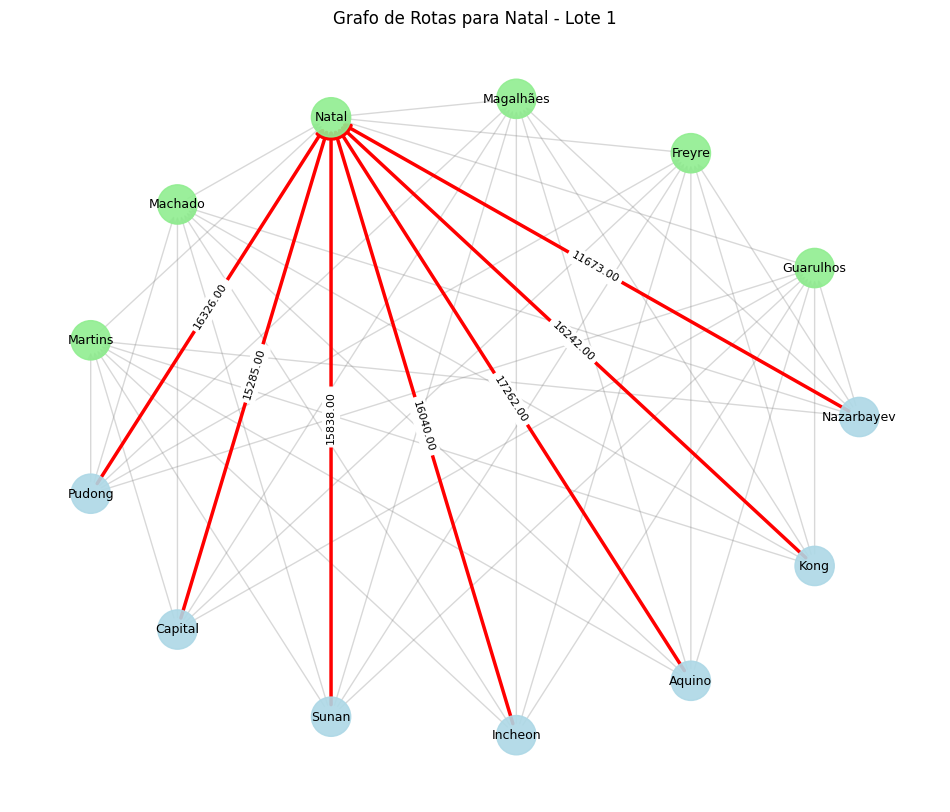

Processando aeroportos: ['Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)', 'Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)']


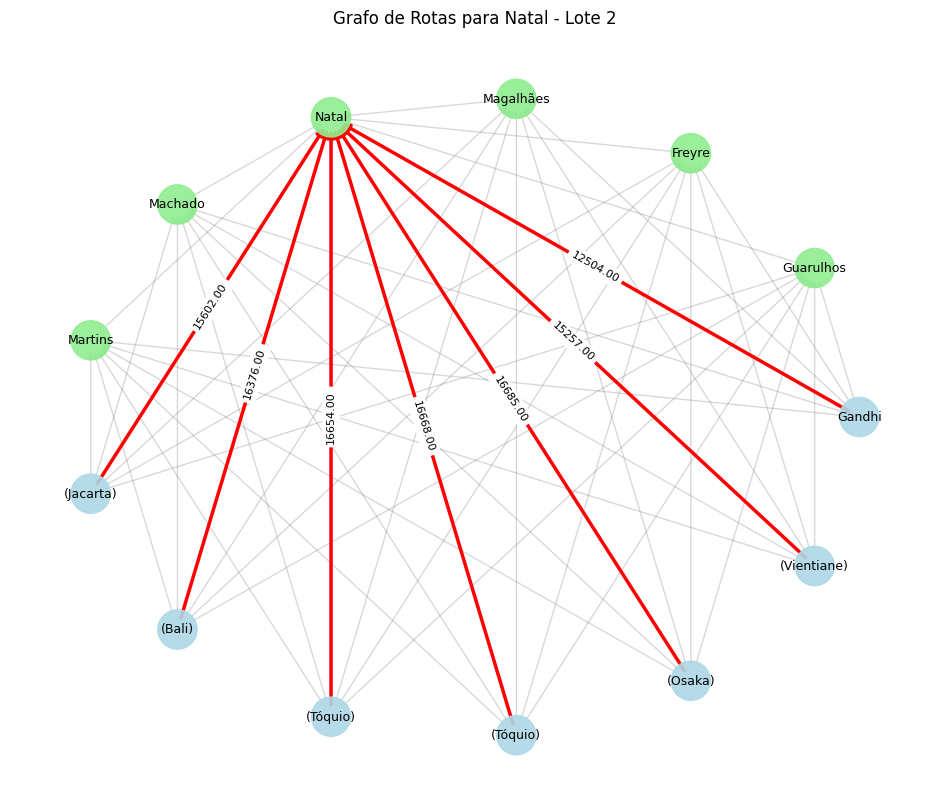

Processando aeroportos: ['Aeroporto Internacional de Kuala Lumpur (Sepang)', 'Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang', 'Aeroporto Internacional de Taiwan Taoyuan']


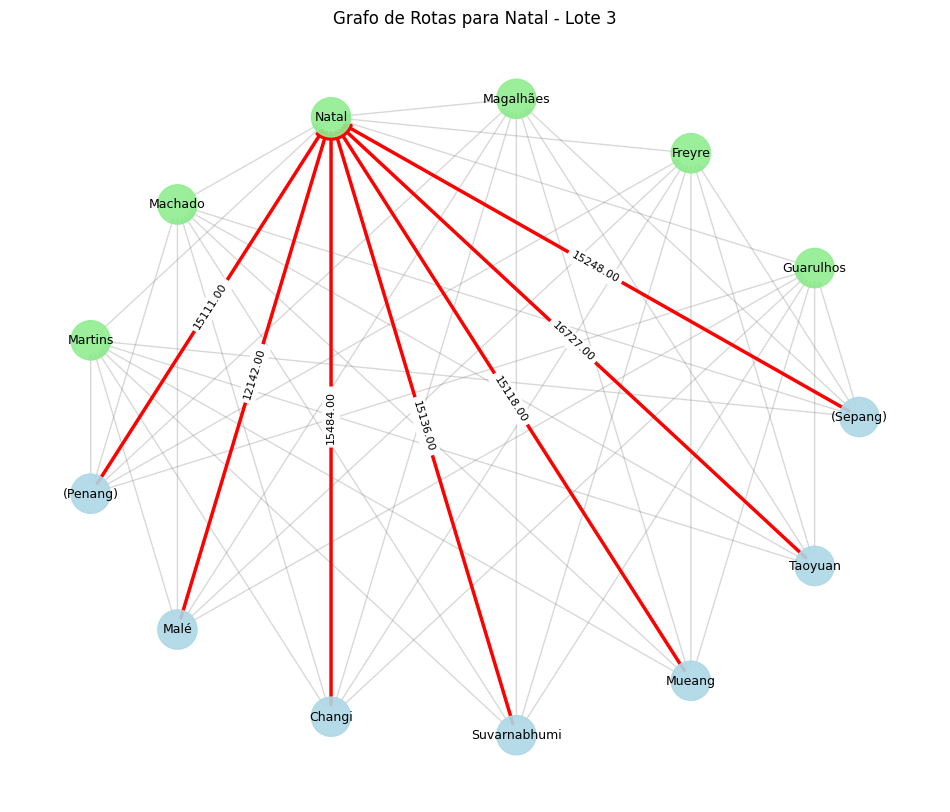

Processando aeroportos: ['Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin', 'Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino']


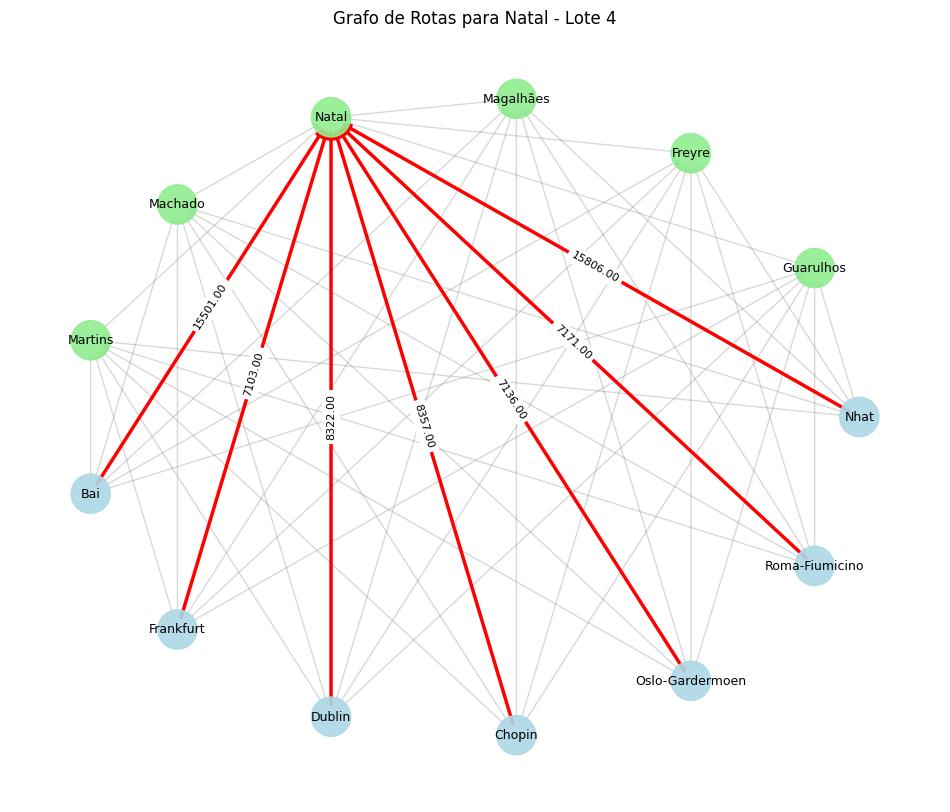

Processando aeroportos: ['Aeroporto de Milão-Malpensa', 'Aeroporto de Praga', 'Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)']


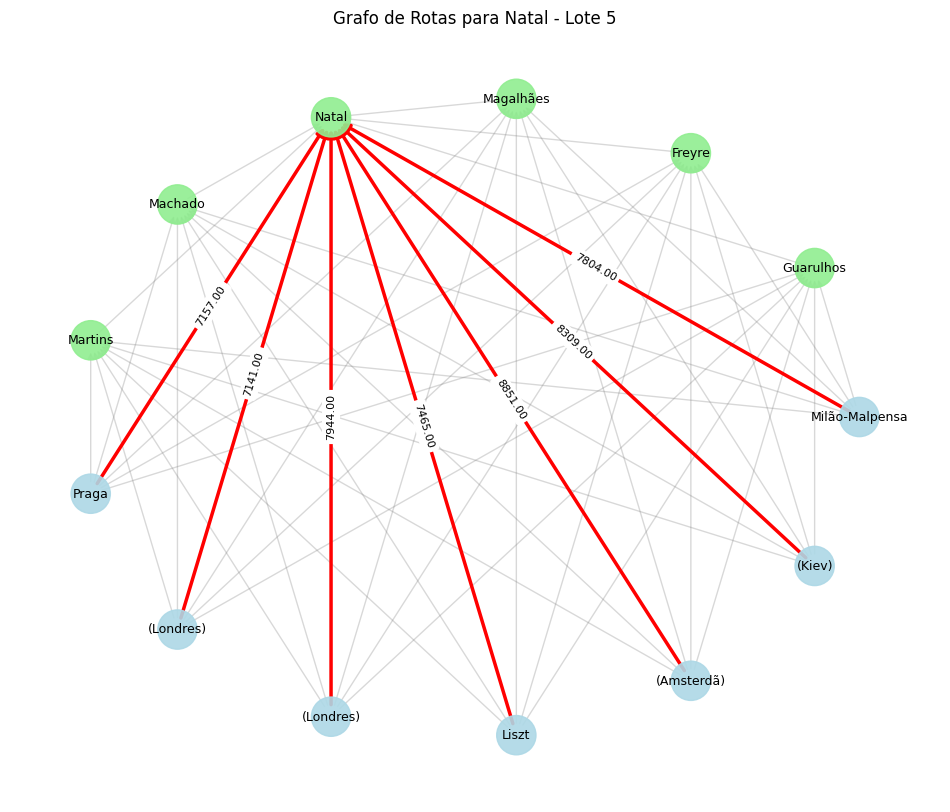

Processando aeroportos: ['Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)', 'Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coandă (Bucareste)']


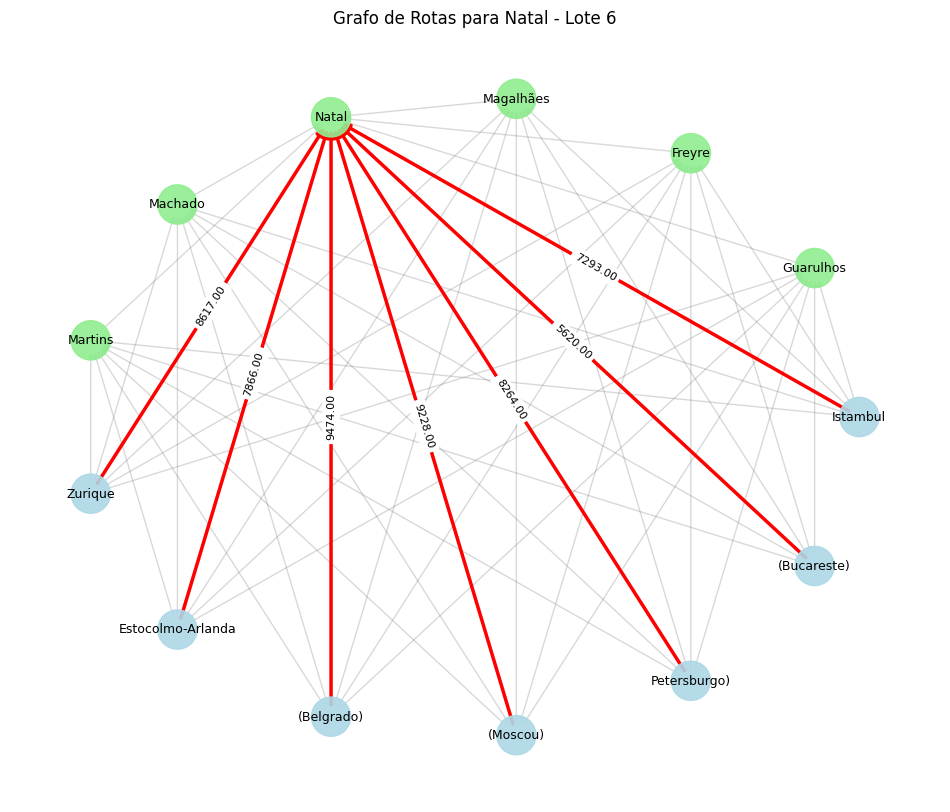

Processando aeroportos: ['Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta', 'Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)']


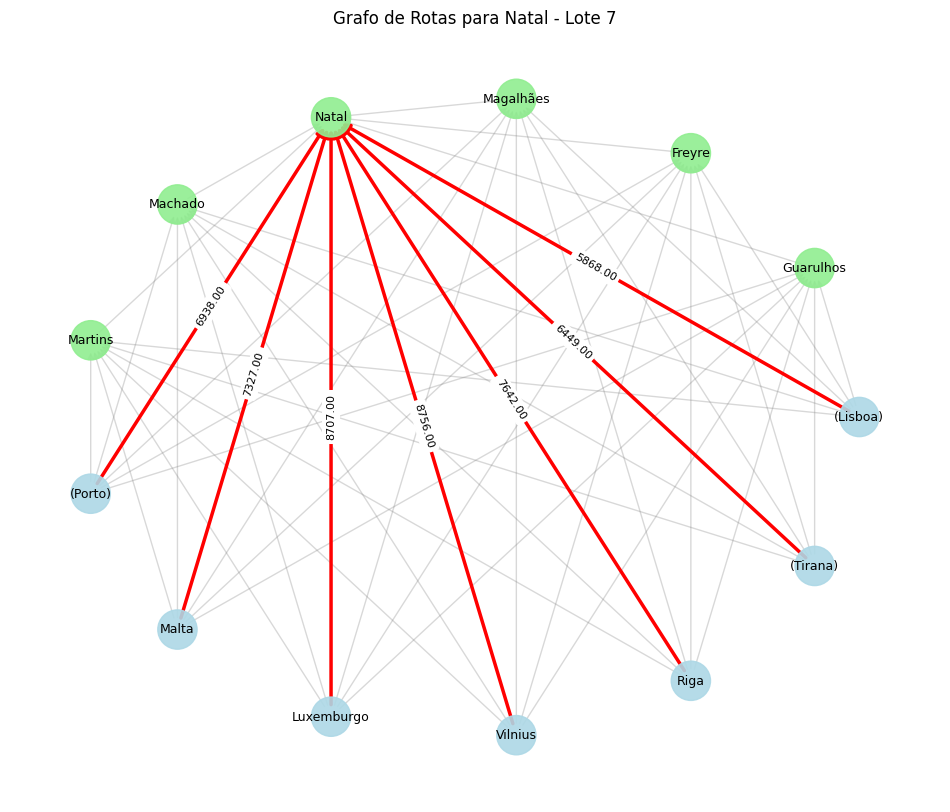

Processando aeroportos: ['Aeroporto de Barcelona-El Prat (Espanha)', 'Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava', 'Aeroporto de Ljubljana Jože Pučnik']


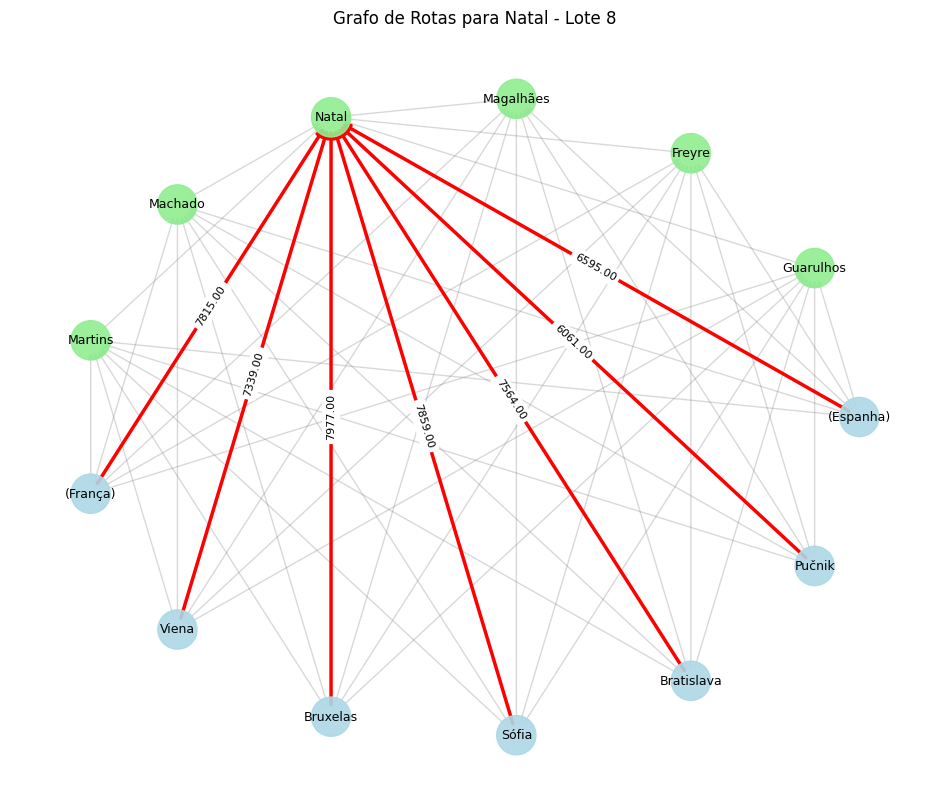

Processando aeroportos: ['Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


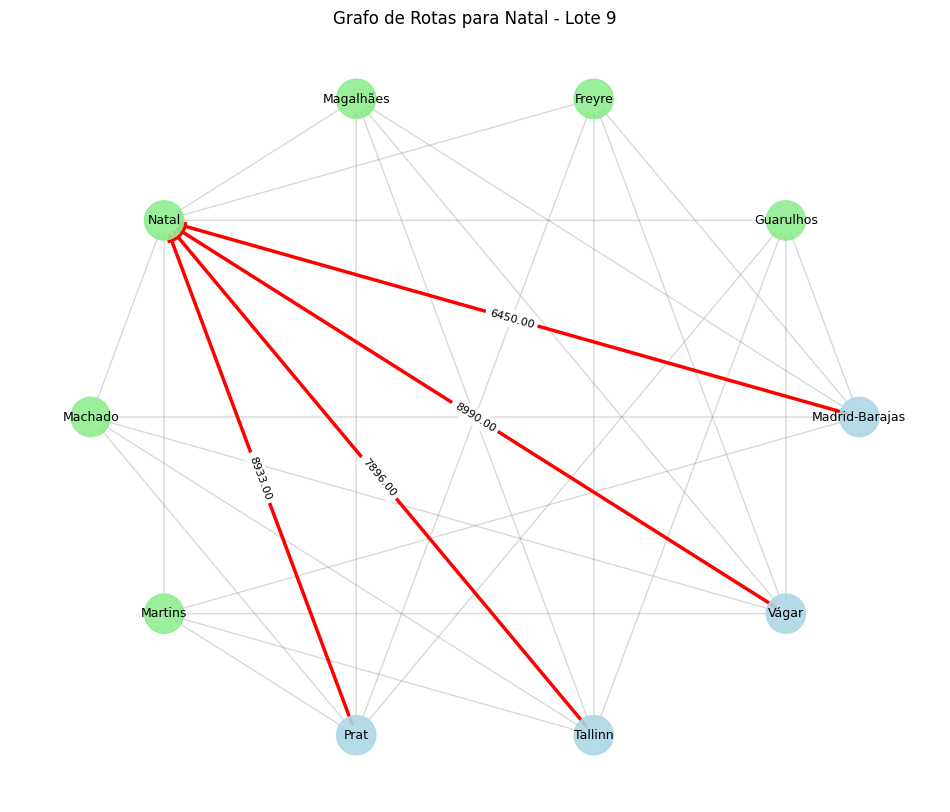

In [61]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Leitura dos dados
rota_original = pd.read_csv('./csv_recebidos/Rota_Original.csv')
distancias = pd.read_csv('./csv_recebidos/Distancias.csv')  # Supondo que este é o dataset com distâncias

# Exemplo de aeroportos nacionais e internacionais
aeroportos_estado = {
    "São Paulo": ["Aeroporto de Congonhas", "Aeroporto Internacional de Guarulhos"],
    "Rio de Janeiro": ["Aeroporto Santos Dumont", "Aeroporto Internacional do Galeão"],
    # ... Adicione outros estados
}

aeroportos_exterior = {
    "Estados Unidos": ["Aeroporto Internacional JFK"],
    "França": ["Aeroporto Charles de Gaulle"],
    # ... Adicione os países e aeroportos internacionais
}

# 2. Função para criar grafos por estado
def criar_grafo_por_estado(estado, rota_original, distancias, aeroportos_estado, aeroportos_exterior):
    G = nx.DiGraph()  # Grafo direcionado
    aeroportos_destino = aeroportos_estado.get(estado, [])
    rotas_estado = rota_original[rota_original['Estado Destino'] == estado]

    # Adicionar as rotas existentes no dataset
    for _, rota in rotas_estado.iterrows():
        aeroporto_intermediario = rota['Aeroporto']
        pais_origem = rota['País Origem']

        # Adiciona rotas entre o país de origem e o aeroporto intermediário
        G.add_edge(pais_origem, aeroporto_intermediario, color='gray', weight=0)  # Sem distância específica

    # Adicionar rotas diretas e verificar se são ideais
    for _, rota in rotas_estado.iterrows():
        aeroporto_intermediario = rota['Aeroporto']
        pais_origem = rota['País Origem']

        for aeroporto_destino in aeroportos_destino:
            # Buscar distância entre o aeroporto intermediário e os aeroportos do estado
            distancia = [
                (df['InputID'] == aeroporto_intermediario) & 
                (df['TargetID'] == aeroporto_destino)
            ]['Distância'].min()

            if not pd.isna(distancia):
                # Se a rota já existe no dataset original
                G.add_edge(aeroporto_intermediario, aeroporto_destino, color='green', weight=distancia)
            else:
                # Adicionar rota ideal (vermelha) caso não esteja no dataset
                G.add_edge(aeroporto_intermediario, aeroporto_destino, color='red', weight=distancia)

    # Adicionar rotas não ideais em cinza
    for aeroporto_origem, aeroporto_destino in distancias[['Aeroporto Origem', 'Aeroporto Destino']].itertuples(index=False):
        if not G.has_edge(aeroporto_origem, aeroporto_destino):
            distancia = distancias[
                (distancias['Aeroporto Origem'] == aeroporto_origem) & 
                (distancias['Aeroporto Destino'] == aeroporto_destino)
            ]['Distância'].min()

            if not pd.isna(distancia):
                G.add_edge(aeroporto_origem, aeroporto_destino, color='gray', weight=distancia)

    return G

# 3. Plotando o grafo
def plotar_grafo(G, estado):
    colors = [G[u][v]['color'] for u, v in G.edges()]
    labels = {edge: f"{G[edge[0]][edge[1]]['weight']} km" for edge in G.edges()}

    pos = nx.spring_layout(G)  # Layout do grafo
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, edge_color=colors, node_size=700, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.title(f"Grafo para o Estado: {estado}")
    plt.show()

# 4. Geração dos grafos para todos os estados
for estado in aeroportos_estado.keys():
    grafo = criar_grafo_por_estado(estado, rota_original, distancias, aeroportos_estado, aeroportos_exterior)
    plotar_grafo(grafo, estado)


In [129]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os dados
df_rotas = pd.read_csv('./csv_recebidos/Rota_Original.csv')  # Dataset com rotas originais
df_distancias = df  # Dataset de distâncias já fornecido

# Função para criar um grafo para um estado
def criar_grafo_estado(df_rotas, df_distancias, estado, aeroportos_exterior, aeroportos_estado, max_nos=15):
    # Filtrar rotas para o estado específico
    rotas_estado = df_rotas[df_rotas['Estado Destino'] == estado]

    # Criar o grafo
    G = nx.DiGraph()

    # Adicionar nós e arestas com base no dataset
    for _, row in rotas_estado.iterrows():
        pais_origem = row['País Origem']
        aeroporto_intermediario = row['Aeroporto Intermediário']
        estado_destino = aeroportos_estado.get(estado)

        # Adicionar o caminho país -> aeroporto intermediário
        if not G.has_edge(pais_origem, aeroporto_intermediario):
            distancia = df_distancias.loc[
                (df_distancias['InputID'] == pais_origem) & (df_distancias['TargetID'] == aeroporto_intermediario),
                'Distância km'
            ]
            distancia = distancia.iloc[0] if not distancia.empty else None

            if distancia:
                G.add_edge(pais_origem, aeroporto_intermediario, weight=distancia, color='gray')

        # Adicionar o caminho aeroporto intermediário -> aeroporto do estado destino
        if estado_destino and not G.has_edge(aeroporto_intermediario, estado_destino):
            distancia = df_distancias.loc[
                (df_distancias['InputID'] == aeroporto_intermediario) & (df_distancias['TargetID'] == estado_destino),
                'Distância km'
            ]
            distancia = distancia.iloc[0] if not distancia.empty else None

            # Rotas inexistentes serão adicionadas em vermelho
            if distancia:
                G.add_edge(aeroporto_intermediario, estado_destino, weight=distancia, color='green')
            else:
                G.add_edge(aeroporto_intermediario, estado_destino, weight=9999, color='red')  # Distância fictícia

    # Dividir em subgrafos se o número de nós exceder o limite
    subgrafos = []
    if len(G.nodes) > max_nos:
        nodes = list(G.nodes)
        for i in range(0, len(nodes), max_nos):
            subgraph_nodes = nodes[i:i + max_nos]
            subgrafos.append(G.subgraph(subgraph_nodes).copy())
    else:
        subgrafos = [G]

    return subgrafos

# Função para visualizar o grafo
def plotar_grafo(G, estado):
    pos = nx.circular_layout(G)

    plt.figure(figsize=(12, 10))

    # Nós
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)

    # Arestas
    edges = G.edges(data=True)
    edge_colors = [data['color'] for _, _, data in edges]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

    # Rótulos
    labels = {node: node.split(' ')[-1] for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Título
    plt.title(f"Grafo de rotas para o estado: {estado}")
    plt.axis('off')
    plt.show()

# Processar e criar grafos por estado
for estado in df_rotas['Estado Destino'].unique():
    subgrafos = criar_grafo_estado(df_rotas, df_distancias, estado, aeroportos_exterior, aeroportos_estado)
    for i, subgrafo in enumerate(subgrafos):
        plotar_grafo(subgrafo, f"{estado} - Subgrafo {i + 1}")


KeyError: 'Estado Destino'